## 线性回归
主要内容：
- 线性回归方程实现
- 梯度下降效果
- 对比不同梯度下降策略
- 建模曲线分析
- 过拟合与欠拟合
- 正则化的作用
- 提前停止策略

In [20]:
import numpy as np
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
import warnings
warnings.filterwarnings('ignore')

回归方程：

![image.png](./source/image/image.png)

In [21]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

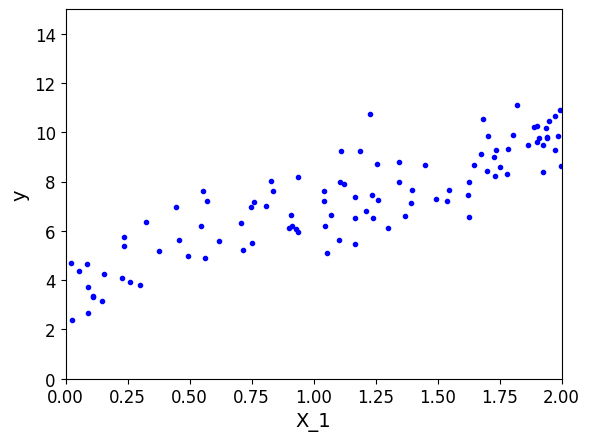

In [22]:
plt.plot(
    X,
    y,
    "b."
)
plt.xlabel("X_1")
plt.ylabel("y")
plt.axis([0,2,0,15])
plt.show()

In [23]:
X_b = np.c_[np.ones((100,1)),X]
theta_nest = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [24]:
theta_nest

array([[3.9202609],
       [2.9609808]])

In [25]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_prodict = X_new_b.dot(theta_nest)
y_prodict

array([[3.9202609],
       [9.8422225]])

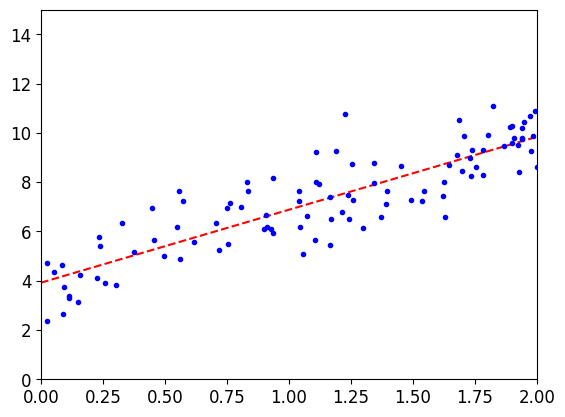

In [26]:
plt.plot(
    X_new,
    y_prodict,
    "r--"
)

plt.plot(
    X,
    y,
    "b."
)

plt.axis([0,2,0,15])
plt.show()

In [27]:
from sklearn.linear_model import LinearRegression
linearRegression = LinearRegression()
linearRegression.fit(X,y)
print(linearRegression.coef_)
print(linearRegression.intercept_)

[[2.9609808]]
[3.9202609]


## 批量梯度下降

In [28]:
eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.rand(2,1)
for iteration in range(n_iterations):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [29]:
theta

array([[3.9202609],
       [2.9609808]])

In [30]:
X_new_b.dot(theta)

array([[3.9202609],
       [9.8422225]])

In [36]:
theta_path_bgd = []
def plot_gradient_descent(theta, eta,theta_path = None):
    m = len(X_b)
    plt.plot(
        X,
        y,
        "b."
    )
    
    n_iterations = 1000
    for _ in range(n_iterations):
        y_prodict = X_new_b.dot(theta)
        plt.plot(
            X_new,
            y_prodict,
            "b-"
        )
        gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path_bgd.append(theta)
            
    plt.xlabel("X_1")
    plt.axis([0,2,0,15])
    plt.title(f"eta = {eta}")

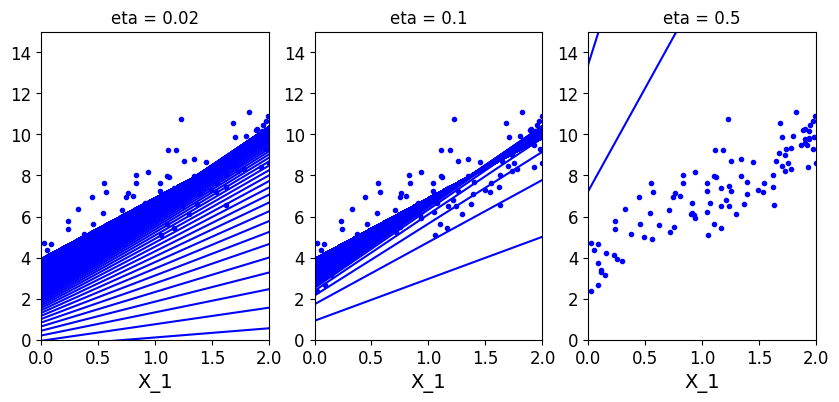

In [39]:
theta = np.random.randn(2,1)
plt.figure(figsize=(10,4))
plt.subplot(131)
plot_gradient_descent(theta, eta= 0.02)
plt.subplot(132)
plot_gradient_descent(theta, eta= 0.1)
plt.subplot(133)
plot_gradient_descent(theta, eta= 0.5)
plt.show()

## 随机梯度下降

In [ ]:
theta_path_sgd=[]
m = len(X_b)
n_epochs = 50
